In [2]:
import torch
import matplotlib.pyplot as plt

In [210]:
X1_1 = torch.rand(10,2) + torch.Tensor([[2,2]])
X1_2 = torch.rand(10,2) + torch.Tensor([[2,1]])
X1 = torch.cat((X1_1,X1_2),0)
X2_1 = torch.rand(10,2) + torch.Tensor([[3,2]])
X2_2 = torch.rand(10,2) + torch.Tensor([[3,1]])
X2 = torch.cat((X2_1,X2_2),0)
X = torch.cat((torch.cat((X1,X2),0),torch.ones(40,1)),1)
Y = torch.cat((torch.ones(20,1),-1*torch.ones(20,1)),0)

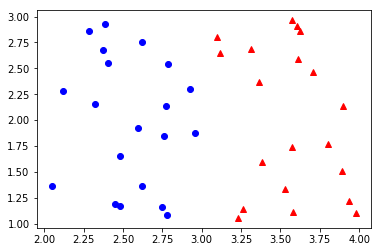

In [211]:
plt.plot(X1[:,0].numpy(),X1[:,1].numpy(),'bo')
plt.plot(X2[:,0].numpy(),X2[:,1].numpy(),'r^')

In [212]:
def cost(w,X,y,lamb):
    st = 1 - (y*X).mm(w)
    st = torch.clamp(st, min=0)
    return torch.sum(st) + (lamb / 2) * torch.sum(w * w)
    
def svm(X,y,iter=10000,lr=0.05,lamb=0):
    w = torch.rand(X.shape[1],1)
    for iteration in range(iter):
        if iteration % 100 == 1:
            print(f"iter #{iteration}: > {cost(w,X,y,lamb)}")
        st = (y*X).mm(w) * torch.ones(1,X.shape[1])
        z = (-y*X)
        z[st>=1]= 0
        w_wo_b = w.clone()
        w_wo_b[-1,:] = 0
        w -= (1/X.shape[0]) * lr*(torch.sum(z,0).view(-1,1) + lamb*(w_wo_b))
    return w

In [213]:
w = svm(X,Y,lamb=0.05)
print(w)
res = X.mm(w)*Y
print(f"{torch.sum(res > 0)}/{X.shape[0]}" )

iter #1: > 54.356834411621094
iter #101: > 26.354970932006836
iter #201: > 24.100858688354492
iter #301: > 22.1514949798584
iter #401: > 20.405845642089844
iter #501: > 18.79698944091797
iter #601: > 17.337196350097656
iter #701: > 15.891877174377441
iter #801: > 14.701228141784668
iter #901: > 13.710946083068848
iter #1001: > 12.764800071716309
iter #1101: > 11.901727676391602
iter #1201: > 11.14062213897705
iter #1301: > 10.502241134643555
iter #1401: > 9.939726829528809
iter #1501: > 9.6241455078125
iter #1601: > 9.3682861328125
iter #1701: > 9.157119750976562
iter #1801: > 8.980226516723633
iter #1901: > 8.844095230102539
iter #2001: > 8.749018669128418
iter #2101: > 8.654853820800781
iter #2201: > 8.561602592468262
iter #2301: > 8.46904182434082
iter #2401: > 8.37728500366211
iter #2501: > 8.286556243896484
iter #2601: > 8.196630477905273
iter #2701: > 8.107620239257812
iter #2801: > 8.019519805908203
iter #2901: > 7.932325839996338
iter #3001: > 7.846297264099121
iter #3101: > 7.

tensor(-4.0918) tensor(0.0517) tensor(12.2796)


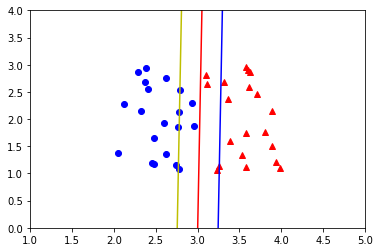

In [220]:
def draw_line(w):
    w1 = w[0][0]
    w2 = w[1][0]    
    b = w[2][0]
    print(w1,w2,b)
    x1 = [2,5]
    y= 0
    plt.plot(x1,[(-(b+w1*x) / w2) for x in x1],'r')
    plt.plot(x1,[(-(b+w1*x+1)  / w2) for x in x1],'b')
    plt.plot(x1,[(-(b+w1*x-1)  / w2) for x in x1],'y')
plt.plot(X1[:,0].numpy(),X1[:,1].numpy(),'bo')
plt.plot(X2[:,0].numpy(),X2[:,1].numpy(),'r^')
plt.axis((1,5,0,4))
draw_line(w)
plt.show()

In [215]:
print(res)

tensor([[0.9995],
        [1.0331],
        [1.7044],
        [2.7114],
        [2.6784],
        [3.0709],
        [2.5673],
        [2.9010],
        [3.7359],
        [0.4180],
        [0.2735],
        [2.1912],
        [1.1012],
        [1.0707],
        [1.6291],
        [3.9719],
        [2.2138],
        [2.3104],
        [0.9551],
        [1.7680],
        [2.3610],
        [2.3159],
        [2.1938],
        [3.5450],
        [2.7631],
        [1.1428],
        [1.3499],
        [0.2437],
        [0.3271],
        [2.4011],
        [0.8945],
        [3.5548],
        [3.7482],
        [3.9532],
        [1.4897],
        [2.3226],
        [0.9974],
        [3.1781],
        [2.0798],
        [2.2632]])
